In [ ]:
from pathlib import Path
!pip install pydicom
import pydicom
import matplotlib.pyplot as plt

     |████████████████████████████████| 2.0 MB 5.4 MB/s 


In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/My Drive/DLMIP/")
os.listdir()

['Data', 'ANN', 'pydicom', 'SE000001', 'CNN1', 'Untitled0.ipynb']

In [ ]:
dicom_file = pydicom.read_file('./pydicom/ID_0000_AGE_0060_CONTRAST_1_CT.dcm')

In [ ]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [ ]:
dicom_file[0x0028, 0x0010]

(0028, 0010) Rows                                US: 512

In [ ]:
dicom_file.Rows

512

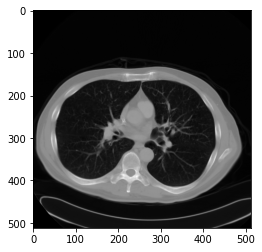

In [ ]:
ct = dicom_file.pixel_array
plt.figure()
plt.imshow(ct,cmap='gray')

In [ ]:
#define a path of directory
path_to_head_mri = Path('./SE000001/')

In [ ]:
#loading all files from a directory
all_files = list(path_to_head_mri.glob('*'))
all_files

[PosixPath('SE000001/MR000021'),
 PosixPath('SE000001/MR000019'),
 PosixPath('SE000001/MR000006'),
 PosixPath('SE000001/MR000007'),
 PosixPath('SE000001/MR000014'),
 PosixPath('SE000001/MR000001'),
 PosixPath('SE000001/MR000015'),
 PosixPath('SE000001/MR000000'),
 PosixPath('SE000001/MR000011'),
 PosixPath('SE000001/MR000003'),
 PosixPath('SE000001/MR000005'),
 PosixPath('SE000001/MR000023'),
 PosixPath('SE000001/MR000012'),
 PosixPath('SE000001/MR000010'),
 PosixPath('SE000001/MR000016'),
 PosixPath('SE000001/MR000009'),
 PosixPath('SE000001/MR000022'),
 PosixPath('SE000001/MR000018'),
 PosixPath('SE000001/MR000017'),
 PosixPath('SE000001/MR000008'),
 PosixPath('SE000001/MR000020'),
 PosixPath('SE000001/MR000013'),
 PosixPath('SE000001/MR000002'),
 PosixPath('SE000001/MR000024'),
 PosixPath('SE000001/MR000004'),
 PosixPath('SE000001/MR000025'),
 PosixPath('SE000001/MR000026')]

In [ ]:
mri_data = []
for path in all_files:
  data = pydicom.read_file(path)
  mri_data.append(data)

In [ ]:
for slice in mri_data[:5]:
  print(slice.SliceLocation)

125.999997173645
113.999995959439
35.9999959546749
41.9999963629367
83.9999967682912


In [ ]:
mri_data_orederd = sorted(mri_data, key=lambda slice: slice.SliceLocation)

In [ ]:
for slice in mri_data_orederd[:5]:
  print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


In [ ]:
full_volume = []
for slice in mri_data_orederd:
  full_volume.append(slice.pixel_array)

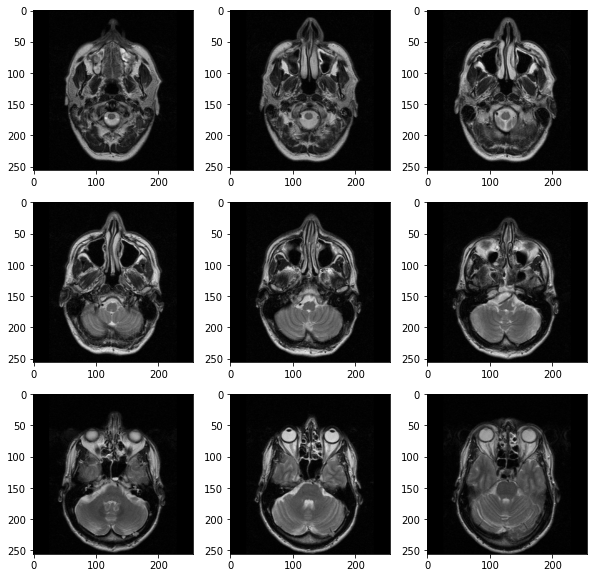

In [ ]:
fig, axis = plt.subplots(3,3,figsize=(10,10))
slice_counter = 0
for i in range(3):
  for j in range(3):
    axis[i][j].imshow(full_volume[slice_counter],cmap='gray')
    slice_counter+=1

In [ ]:
!pip install simpleITK
import SimpleITK as sitk 

In [ ]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
print(series_ids)

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)


In [ ]:
series_file_names = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[0])
series_file_names

In [ ]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [ ]:
image_data = series_reader.Execute()

In [ ]:
head_mri = sitk.GetArrayFromImage(image_data)
head_mri.shape

(27, 256, 256)

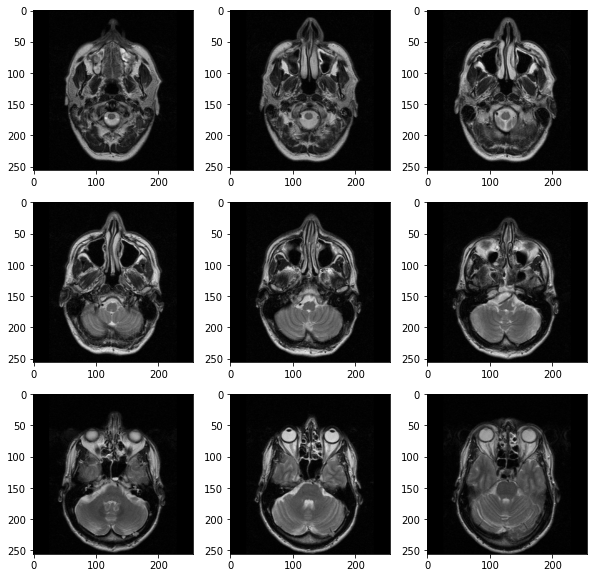

In [ ]:
fig, axis = plt.subplots(3,3,figsize=(10,10))
slice_counter = 0
for i in range(3):
  for j in range(3):
    axis[i][j].imshow(head_mri[slice_counter],cmap='gray')
    slice_counter+=1